In [1]:
from typing import OrderedDict

import torch
from matplotlib import pyplot as plt

from protocol.BB84Protocol import BB84Protocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import Layer
from protocol.connection_elements.Noise import Noise

def experiment(noise_error):
    channel_noise = Noise(noise_error, True)

    print("Classic pipeline")
    pipeline = BB84Protocol(n_bits=500, elements=[channel_noise])
    acc, classic_qber = pipeline.run()
    print(f"Accuracy: {acc} QBER: {classic_qber}")

    print("Trained pipeline")
    pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()])
    print(f"Start parameters {pipeline_train.get_parameters()}")

    acc, start_qber = pipeline_train.run()
    print(f"Before training: Accuracy: {acc} QBER: {start_qber}")

    for epoch in range(51):
        loss = pipeline_train.train()
        if epoch % 10 == 0:
            print(f'epoch: {epoch}, loss: {loss}')

    print(f"Final parameters {pipeline_train.get_parameters()}")
    acc, final_qber = pipeline_train.run()
    print(f"After training: Accuracy: {acc} QBER: {final_qber}")

    sd = pipeline_train.model.state_dict()
    sd = OrderedDict({k: torch.zeros_like(v) for k, v in sd.items()})
    pipeline_train.model.load_state_dict(sd)
    print(f"Zeroed parameters {pipeline_train.get_parameters()}")
    acc, zeroed_qber = pipeline_train.run()
    print(f"Zeroed mitigation: Accuracy: {acc} QBER: {zeroed_qber}")

    return classic_qber, start_qber, final_qber, zeroed_qber

Noise function: depolarizing_error intensity: 0.1
Classic pipeline
Accuracy: 0.9384615384615385 QBER: 0.06153846153846154
Trained pipeline


/tmp/ipykernel_286452/4012744418.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()])


Start parameters {'x_0': np.float32(-0.49959671), 'y_0': np.float32(0.34702885), 'z_0': np.float32(0.1663363), 'x_1': np.float32(-0.49330652), 'y_1': np.float32(0.1073786), 'z_1': np.float32(0.25621498)}
Before training: Accuracy: 0.7591240875912408 QBER: 0.24087591240875916
epoch: 0, loss: 0.1683012992143631
epoch: 10, loss: 0.023528005927801132
epoch: 20, loss: 0.006867107469588518
epoch: 30, loss: 0.0006289618904702365
epoch: 40, loss: 0.00017038025544025004
epoch: 50, loss: 0.00019964910461567342
Final parameters {'x_0': np.float32(-0.047753602), 'y_0': np.float32(0.07422792), 'z_0': np.float32(-0.12323897), 'x_1': np.float32(0.028724942), 'y_1': np.float32(-0.095747724), 'z_1': np.float32(0.12274084)}
After training: Accuracy: 0.8759124087591241 QBER: 0.12408759124087587
Zeroed parameters {'x_0': np.float32(0.0), 'y_0': np.float32(0.0), 'z_0': np.float32(0.0), 'x_1': np.float32(0.0), 'y_1': np.float32(0.0), 'z_1': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.843065693430657 QBE

/tmp/ipykernel_286452/4012744418.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()])


Before training: Accuracy: 0.6884057971014492 QBER: 0.3115942028985508
epoch: 0, loss: 0.21310104429721832
epoch: 10, loss: 0.038553059101104736
epoch: 20, loss: 0.007864443585276604
epoch: 30, loss: 0.0007516794139519334
epoch: 40, loss: 9.960182069335133e-05
epoch: 50, loss: 9.000791033031419e-05
Final parameters {'x_2': np.float32(-0.21377306), 'y_2': np.float32(-0.5377242), 'z_2': np.float32(-0.114036135), 'x_3': np.float32(0.31663114), 'y_3': np.float32(0.49322307), 'z_3': np.float32(0.25685993)}
After training: Accuracy: 0.7210144927536232 QBER: 0.27898550724637683
Zeroed parameters {'x_2': np.float32(0.0), 'y_2': np.float32(0.0), 'z_2': np.float32(0.0), 'x_3': np.float32(0.0), 'y_3': np.float32(0.0), 'z_3': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.6159420289855072 QBER: 0.3840579710144928
Noise function: depolarizing_error intensity: 0.5
Classic pipeline
Accuracy: 0.7206477732793523 QBER: 0.27935222672064774
Trained pipeline
Start parameters {'x_4': np.float32(-0.56255674

/tmp/ipykernel_286452/4012744418.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()])


Before training: Accuracy: 0.592741935483871 QBER: 0.407258064516129
epoch: 0, loss: 0.31679394841194153
epoch: 10, loss: 0.034330375492572784
epoch: 20, loss: 0.00114171183668077
epoch: 30, loss: 0.0032796277664601803
epoch: 40, loss: 0.002177317626774311
epoch: 50, loss: 0.0004630228504538536
Final parameters {'x_4': np.float32(-1.4757767), 'y_4': np.float32(-0.13905823), 'z_4': np.float32(0.26302516), 'x_5': np.float32(1.4740269), 'y_5': np.float32(0.27301723), 'z_5': np.float32(0.044202738)}
After training: Accuracy: 0.5806451612903226 QBER: 0.4193548387096774
Zeroed parameters {'x_4': np.float32(0.0), 'y_4': np.float32(0.0), 'z_4': np.float32(0.0), 'x_5': np.float32(0.0), 'y_5': np.float32(0.0), 'z_5': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.5645161290322581 QBER: 0.4354838709677419


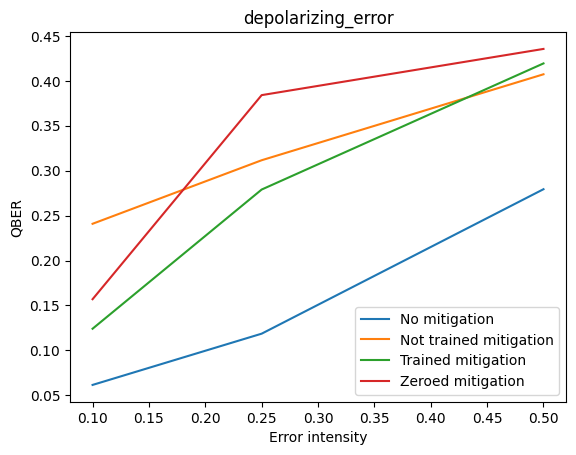

Noise function: amplitude_damping_error intensity: 0.1
Classic pipeline
Accuracy: 0.9692307692307692 QBER: 0.03076923076923077
Trained pipeline
Start parameters {'x_6': np.float32(-0.2132479), 'y_6': np.float32(-0.8869827), 'z_6': np.float32(-0.7864802), 'x_7': np.float32(-0.9590684), 'y_7': np.float32(0.91008306), 'z_7': np.float32(0.73842)}


/tmp/ipykernel_286452/4012744418.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()])


Before training: Accuracy: 0.6170212765957447 QBER: 0.3829787234042553
epoch: 0, loss: 0.34927088022232056
epoch: 10, loss: 0.01813635602593422
epoch: 20, loss: 0.005466262344270945
epoch: 30, loss: 0.008589748293161392
epoch: 40, loss: 0.002412450034171343
epoch: 50, loss: 0.00016927487740758806
Final parameters {'x_6': np.float32(0.5410132), 'y_6': np.float32(-0.64290655), 'z_6': np.float32(-0.46321994), 'x_7': np.float32(-0.3873801), 'y_7': np.float32(0.77311283), 'z_7': np.float32(0.10052041)}
After training: Accuracy: 0.8680851063829788 QBER: 0.13191489361702124
Zeroed parameters {'x_6': np.float32(0.0), 'y_6': np.float32(0.0), 'z_6': np.float32(0.0), 'x_7': np.float32(0.0), 'y_7': np.float32(0.0), 'z_7': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.8765957446808511 QBER: 0.12340425531914889
Noise function: amplitude_damping_error intensity: 0.25
Classic pipeline
Accuracy: 0.8962962962962963 QBER: 0.10370370370370374
Trained pipeline
Start parameters {'x_8': np.float32(-0.45586

/tmp/ipykernel_286452/4012744418.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()])


Before training: Accuracy: 0.808695652173913 QBER: 0.19130434782608696
epoch: 0, loss: 0.07172252237796783
epoch: 10, loss: 0.00026708433870226145
epoch: 20, loss: 0.0003801920101977885
epoch: 30, loss: 0.0007984890835359693
epoch: 40, loss: 0.0005901175318285823
epoch: 50, loss: 0.0001246890751644969
Final parameters {'x_8': np.float32(-0.14205757), 'y_8': np.float32(-0.54431546), 'z_8': np.float32(0.1564216), 'x_9': np.float32(0.07459069), 'y_9': np.float32(0.54460245), 'z_9': np.float32(-0.0922508)}
After training: Accuracy: 0.7739130434782608 QBER: 0.22608695652173916
Zeroed parameters {'x_8': np.float32(0.0), 'y_8': np.float32(0.0), 'z_8': np.float32(0.0), 'x_9': np.float32(0.0), 'y_9': np.float32(0.0), 'z_9': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.7565217391304347 QBER: 0.24347826086956526
Noise function: amplitude_damping_error intensity: 0.5
Classic pipeline
Accuracy: 0.7551867219917012 QBER: 0.24481327800829877
Trained pipeline
Start parameters {'x_10': np.float32(0.0

/tmp/ipykernel_286452/4012744418.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()])


Before training: Accuracy: 0.609375 QBER: 0.390625
epoch: 0, loss: 0.28688809275627136
epoch: 10, loss: 0.04531317204236984
epoch: 20, loss: 0.00439390679821372
epoch: 30, loss: 0.00019879477622453123
epoch: 40, loss: 0.0011983906151726842
epoch: 50, loss: 0.0007872652495279908
Final parameters {'x_10': np.float32(0.51335245), 'y_10': np.float32(-0.014197623), 'z_10': np.float32(-1.0377177), 'x_11': np.float32(-0.28757754), 'y_11': np.float32(0.50213945), 'z_11': np.float32(0.9755816)}
After training: Accuracy: 0.62890625 QBER: 0.37109375
Zeroed parameters {'x_10': np.float32(0.0), 'y_10': np.float32(0.0), 'z_10': np.float32(0.0), 'x_11': np.float32(0.0), 'y_11': np.float32(0.0), 'z_11': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.56640625 QBER: 0.43359375


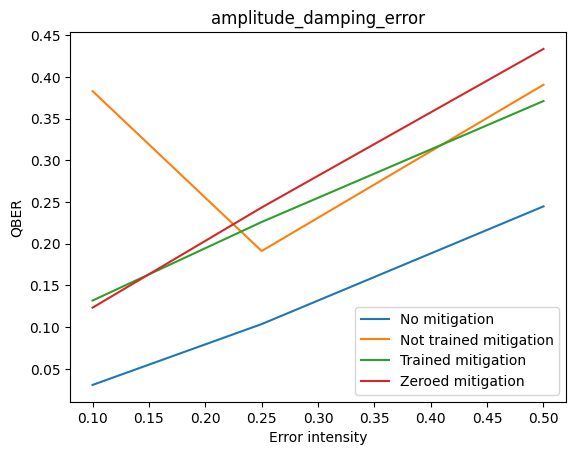

Noise function: phase_damping_error intensity: 0.1
Classic pipeline
Accuracy: 0.9882352941176471 QBER: 0.0117647058823529
Trained pipeline
Start parameters {'x_12': np.float32(-0.3775785), 'y_12': np.float32(-0.17801917), 'z_12': np.float32(0.29448438), 'x_13': np.float32(-0.56934094), 'y_13': np.float32(-0.13760245), 'z_13': np.float32(-0.33064222)}


/tmp/ipykernel_286452/4012744418.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()])


Before training: Accuracy: 0.8780487804878049 QBER: 0.12195121951219512
epoch: 0, loss: 0.10848437249660492
epoch: 10, loss: 0.01813235506415367
epoch: 20, loss: 0.005553470458835363
epoch: 30, loss: 0.001379779540002346
epoch: 40, loss: 0.000313336931867525
epoch: 50, loss: 8.084849832812324e-05
Final parameters {'x_12': np.float32(0.09567714), 'y_12': np.float32(-0.043080203), 'z_12': np.float32(0.23467006), 'x_13': np.float32(-0.07037403), 'y_13': np.float32(0.030510642), 'z_13': np.float32(-0.23385149)}
After training: Accuracy: 0.9634146341463414 QBER: 0.03658536585365857
Zeroed parameters {'x_12': np.float32(0.0), 'y_12': np.float32(0.0), 'z_12': np.float32(0.0), 'x_13': np.float32(0.0), 'y_13': np.float32(0.0), 'z_13': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.9512195121951219 QBER: 0.04878048780487809
Noise function: phase_damping_error intensity: 0.25
Classic pipeline
Accuracy: 0.975609756097561 QBER: 0.024390243902439046
Trained pipeline
Start parameters {'x_14': np.flo

/tmp/ipykernel_286452/4012744418.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()])


Before training: Accuracy: 0.7071129707112971 QBER: 0.2928870292887029
epoch: 0, loss: 0.24804216623306274
epoch: 10, loss: 0.0453902930021286
epoch: 20, loss: 0.01369239017367363
epoch: 30, loss: 0.0030891301576048136
epoch: 40, loss: 0.0005916572990827262
epoch: 50, loss: 0.0001359062734991312
Final parameters {'x_14': np.float32(-0.42099282), 'y_14': np.float32(0.085391104), 'z_14': np.float32(-0.7759062), 'x_15': np.float32(0.27864334), 'y_15': np.float32(-0.38429344), 'z_15': np.float32(0.67945886)}
After training: Accuracy: 0.9288702928870293 QBER: 0.07112970711297073
Zeroed parameters {'x_14': np.float32(0.0), 'y_14': np.float32(0.0), 'z_14': np.float32(0.0), 'x_15': np.float32(0.0), 'y_15': np.float32(0.0), 'z_15': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.8493723849372385 QBER: 0.15062761506276146
Noise function: phase_damping_error intensity: 0.5
Classic pipeline
Accuracy: 0.9156626506024096 QBER: 0.08433734939759041
Trained pipeline
Start parameters {'x_16': np.float32

/tmp/ipykernel_286452/4012744418.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()])


Before training: Accuracy: 0.5882352941176471 QBER: 0.4117647058823529
epoch: 0, loss: 0.28405511379241943
epoch: 10, loss: 0.010734437964856625
epoch: 20, loss: 0.0025623261462897062
epoch: 30, loss: 0.004781922325491905
epoch: 40, loss: 0.0012921225279569626
epoch: 50, loss: 0.00026575339143164456
Final parameters {'x_16': np.float32(-1.1608698), 'y_16': np.float32(-0.3977974), 'z_16': np.float32(-0.7910044), 'x_17': np.float32(1.1301011), 'y_17': np.float32(-0.61362964), 'z_17': np.float32(0.6620817)}
After training: Accuracy: 0.7563025210084033 QBER: 0.24369747899159666
Zeroed parameters {'x_16': np.float32(0.0), 'y_16': np.float32(0.0), 'z_16': np.float32(0.0), 'x_17': np.float32(0.0), 'y_17': np.float32(0.0), 'z_17': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.7857142857142857 QBER: 0.2142857142857143


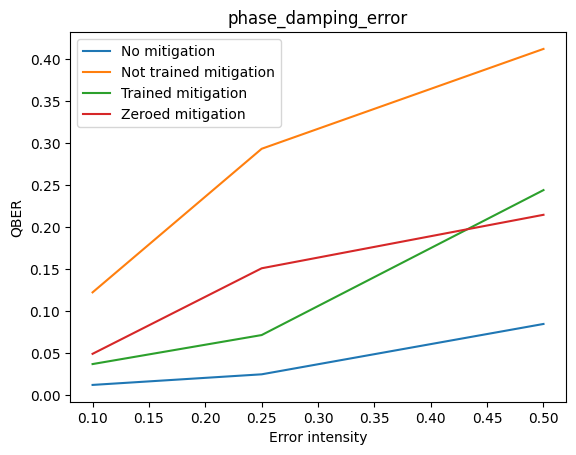

In [2]:
import numpy as np
from qiskit_aer.noise import depolarizing_error, amplitude_damping_error, phase_damping_error

noise_functions = {"depolarizing_error": lambda p: depolarizing_error(p, 1),
                   "amplitude_damping_error": amplitude_damping_error,
                   "phase_damping_error": phase_damping_error}

error_intensities = [0.1, 0.25, 0.5]

for name, noise in noise_functions.items():
    qber_results = []
    for p in error_intensities:
        print("========================")
        print(f"Noise function: {name} intensity: {p}")
        qber_results.append(experiment(noise(p)))
    qber_results = np.array(qber_results).T
    plt.plot(error_intensities, qber_results[0], label="No mitigation")
    plt.plot(error_intensities, qber_results[1], label="Not trained mitigation")
    plt.plot(error_intensities, qber_results[2], label="Trained mitigation")
    plt.plot(error_intensities, qber_results[3], label="Zeroed mitigation")
    plt.title(name)
    plt.xlabel("Error intensity")
    plt.ylabel("QBER")
    plt.legend()
    plt.show()
